In [1]:
from imageai.Detection import ObjectDetection
from matplotlib import pyplot as plt
import os

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
from imageai.Detection import ObjectDetection
import os

current_dir = os.getcwd()
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(current_dir , 'yolo.h5'))
detector.loadModel()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Note

Change the image name to the image you want and re-execute the code.

i.e `image = 'test_image.jpg'` to `image = 'custom_image.jpg'`. 

ensure that `custom_image.jpg` is in the `images` sub folder of this project.

NameError: name 'img' is not defined

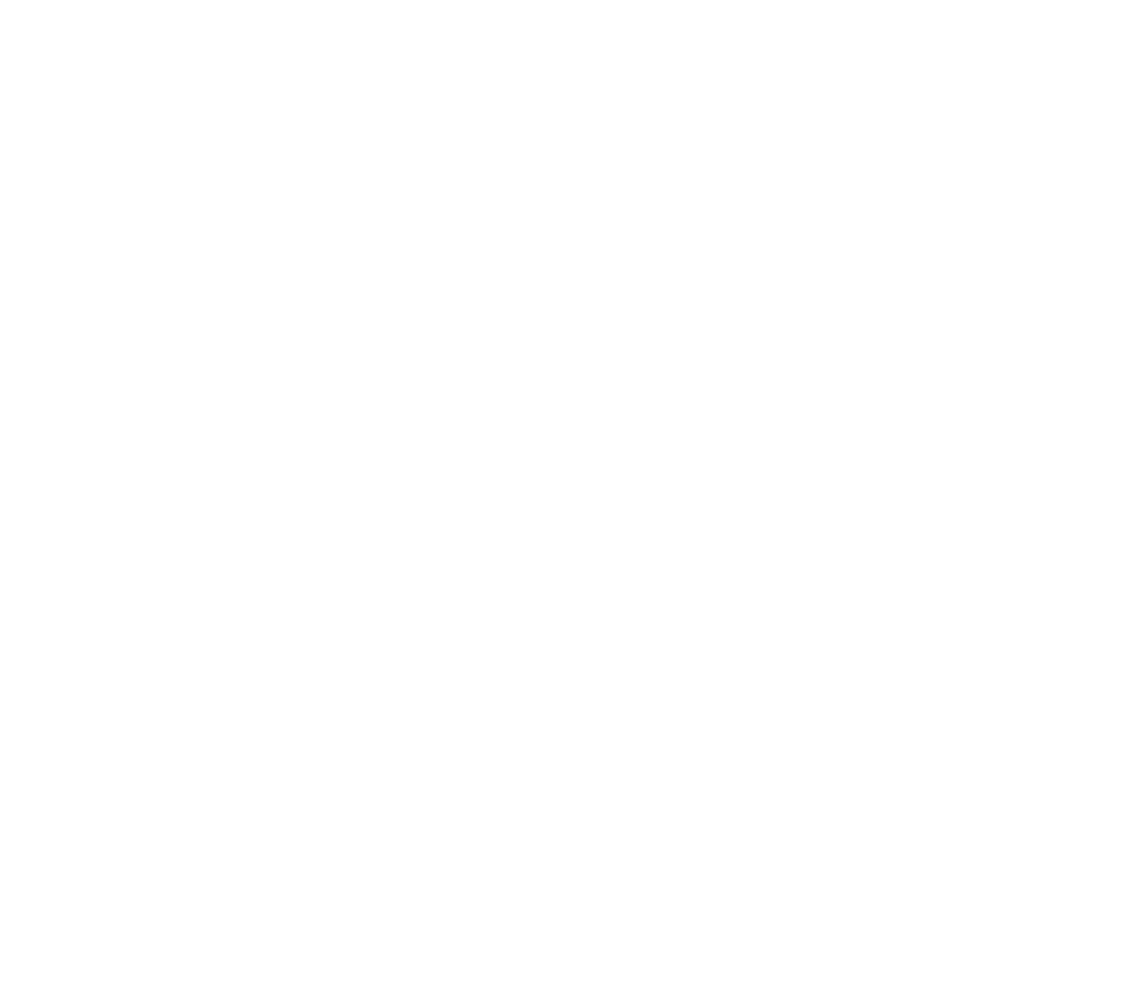

In [4]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.axis('off')
plt.imshow(img)

In [ ]:
custom_objects = detector.CustomObjects(person=True)
detected_image_array, detections = detector.detectCustomObjectsFromImage(custom_objects=custom_objects, input_type='array', input_image=img, output_type="array", minimum_percentage_probability=70)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.axis('off')
plt.imshow(detected_image_array)

In [ ]:
from os import listdir, path
from os.path import isfile, join

output_image_path = 'output_images'
input_image_path = 'input_images'

if not path.exists(output_image_path):
    os.mkdir(output_image_path)
if not path.exists(input_image_path):
    os.mkdir(input_image_path)
    
images = [f for f in listdir(input_image_path) if isfile(join(input_image_path, f)) and f.endswith('.jpg')]

custom_objects = detector.CustomObjects(person=True, car=True)
for image in images:
    detector.detectCustomObjectsFromImage(custom_objects=custom_objects, input_image=join(input_image_path, image), output_image_path=join(output_image_path, image), minimum_percentage_probability=70)